|Name|SNR|ANR|
|----|---|----|
|Stamatis Stasinos|2144729|u253622|

In [17]:
import numpy as np
import pandas as pd
import scipy as sp
import pymc as pm
import matplotlib.pyplot as plt

# Paper= The Market for Lemons  
George A. Akerlof (1970) [Link Text](https://www.jstor.org/stable/1879431)

The paper challenges the assumption that markets functioned perfectly and that prices always reflected all available information by demonstaring how important assymetric information is and how it could lead to market failure.

More specifically Akerlof demonstrates that in markets where buyers and sellers have access to different levels of information, more accurately where sellers know more about the product quality than buyers (asymmetric information), it can lead to adverse selection. This situation often results in high-quality goods being driven out of the market, as buyers are unable to distinguish between good and bad products and thus are unwilling to pay premium prices, leading to market failure. This insight into the role of information asymmetry has profound implications for economic theory and policy.


# Research question

The paper focuses on the effects of information assymetry and how this is able to destroy the market. I am going to incorporate in the model a soft mechanism, like technology ( AI-based product quality assessments) which is able to reduce the problem and to permit to good quality products remain in the market.

## Preview of the answers
We will see that asymmetric information can destroy a market because buyers cannot tell the difference between high-quality cars (peaches) and low-quality cars (lemons). This pushes prices down and leads to a market full of lemons, a problem known as adverse selection. The low prices in such a market mean that mid- and high-quality cars cannot stay in the market, which reduces utility for everyone involved.

To address this, I update the model by introducing technology—an AI system with 80% accuracy. This AI helps buyers get a better idea of car quality. With AI, the equilibrium price immediately increased, allowing mid-quality cars to remain in the market. Unlike the initial model, where only lemons were left, the AI allowed buyers to pay more for better-quality cars. This created a more balanced and efficient market.

Next, I will focuse on maximizing the number of successful transactions. A successful transaction happens when a buyer’s utility is positive or neutral, meaning they value the car at least as much as they pay for it. The number of successful transactions depends on the utility coefficient, which measures how much buyers value cars. When this coefficient is higher, buyers are willing to pay more, leading to more transactions.

The results show that AI helped buyers understand car quality better. This gave sellers the ability to set different prices based on the quality of their cars. In the initial model, there was a price threshold, and if prices went too low, sellers of good-quality cars would leave the market. With AI, this threshold disappears because sellers can charge higher prices for better-quality cars. Buyers are willing to pay these prices because they trust the AI’s assessment of quality.

This change in pricing keeps mid- and high-quality cars in the market, increasing the number of successful transactions. Buyers who want mid-quality cars can now find them, and sellers can sell these cars at fair prices. Unlike before, the market doesn’t collapse into a pool of lemons.

The higher the utility coefficient, the more buyers value the cars, and this leads to even more successful transactions. AI reduces the gap in information, which was the main cause of the market failure in the original model. By solving this problem, AI creates a stable market where both buyers and sellers benefit.

In summary, AI prevents the market from unraveling by helping buyers identify quality cars. This increases prices, keeps mid- and high-quality cars in the market, and improves overall utility. By allowing sellers to differentiate prices, AI creates a fairer and more efficient market for everyone.

# Motivation

The problem of adverse selection exists in a lot of different market e.g. health insurance market . In the past,  we were not able to mitigate it due to lack of appropriate technology, but nowadays probably with the use of AI models may we can minimize adverse selection.


# Main assumptions

In our main model, the important assumptions are that (i) the goods (cars) are either good quality (peaches) or bad quality (lemons) and there are some mid-quality too, (ii) the buyers do not know the quality of the product, (iii) the sellers know exactly the quality of the product, (iv) the  quality of the goods is uniformly distributed between 0 and 100.

# Model in the paper

## Sellers

The buyer cannot determine the quality of the car and distinguish peaches from lemons but sellers can. Hence, all cars are seemed identical to buyers and they always choose the less expensive car or in other words the car with the lowest price (P). Imagine that there are two cars in the market which they cost P1 and P2 where P1>P2 then all buyers prefer the first car with P1. So all the sellers have to decrease their price. Some cars have higher value than the lowest price. Their sellers will drop them out from the market and only the cars with the lower value will remain there (adverse selection).

This happens becauese the sellers have a utility function of the seller is defined as follows:

\begin{equation}
U_S = Σ_{j=1}^{n} X_j + M 
\end{equation}

Where Xj= quality of the jth car owned and M=utility from other goods.
The seller will put the car on the market only if selling it will increase his utility, ergo when P>Xj. 









## Sellers' market

The code below initiates a market simulation where each of the 1000 sellers has one car. It assigns a random quality between 1 and 100 to each car, reflecting a realistic variability in product quality. This data is stored in a DataFrame called market, which organizes the car qualities efficiently for further analysis. The DataFrame is then sorted in descending order based on car quality, prioritizing higher-quality cars for any subsequent operations or analyses.To calculate the utility for each seller, the code adds a constant value 
M=30, which represents a fixed utility from alternative goods unrelated to the cars. This results in a new utility value for each seller, calculated as the sum of the car’s quality and the fixed utility  M, and stored in the DataFrame.
This setup is intended to simulate and analyze market behaviors, specifically focusing on how seller utility impacts transaction dynamics. A typical extension of this code would involve integrating buyer interactions and applying optimization techniques to determine the equilibrium price that maximizes successful transactions, where buyer utility exceeds a certain threshold (often zero), indicating a willingness to purchase.

# My code

In [18]:
s= 1000 # sellers' population
M=30 
quality= np.random.randint(1, 101, size=s) # cars' quality
market= pd.DataFrame(quality, columns=['Quality']) # dataframe with the sellers and the car quality of each seller. 
market = market.sort_values(by='Quality', ascending=False)
market['Utility'] = market['Quality'] + M # I am adding acolumn with the utility for each seller 
print(market.head()) 

     Quality  Utility
88       100      130
989      100      130
507      100      130
643      100      130
715      100      130


To make more understandable the effects of assymetric information I generate a histogram to visualize the distribution of car qualities in a simulated market, highlighting how a specified quality threshold influences seller behavior. I set up a 12 by 6 inches figure and I generate a histogram with 30 bins, initially colored gray. The histogram bars represent the frequency of cars at different quality levels. Using a loop, bars are color-coded: bars representing car qualities above the threshold are colored dark blue indicating these cars are less likely to be sold, while those below the threshold are colored blue, suggesting they are likely to be put on the market. A dashed vertical line marks the threshold on the plot, serving as a clear visual separator. Text annotations provide insights on which cars are on the market based on their quality. The plot is titled 'Market Impact of Adverse Selection' to reflect its analysis focus, with labels for car quality and frequency on the x-axis and y-axis respectively. This visualization effectively demonstrates the concept of adverse selection, where only lower-quality cars are sold due to the quality threshold.

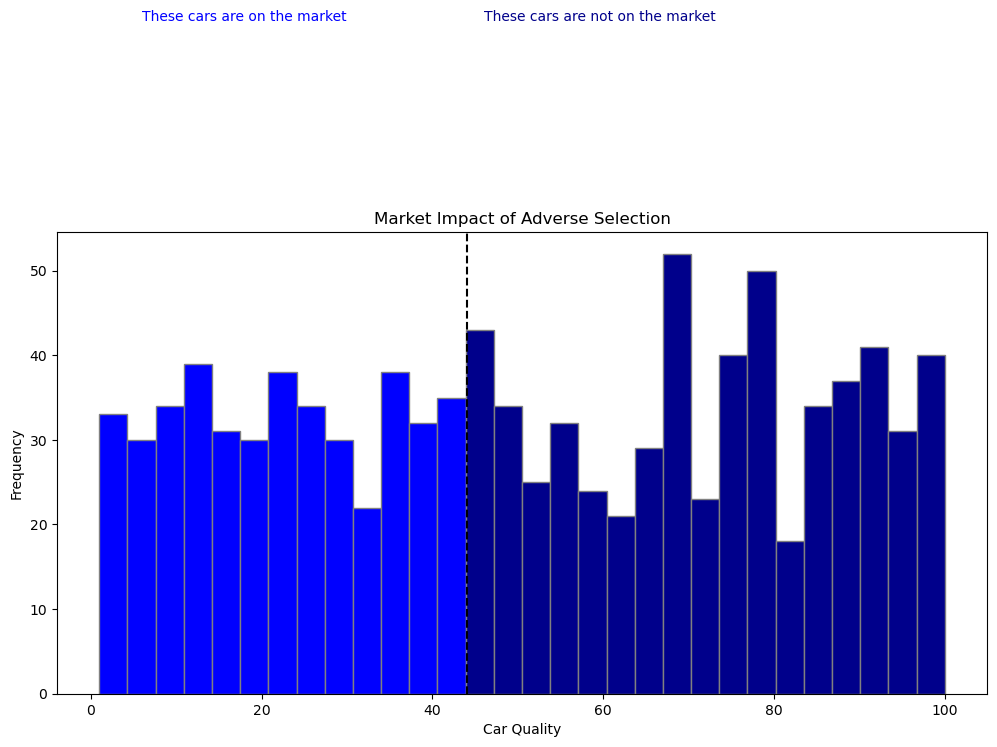

In [19]:
# Let's give an example of how the market works
threshold=44 #price of the cars. Owners with cars whose quality is lower they will prefer to sell them
plt.figure(figsize=(12, 6))

n, bins, patches = plt.hist(quality, bins=30, color='gray', edgecolor='gray') # Histogram of car qualities

for patch, rightside in zip(patches, bins[1:]): # Coloring bars based on threshold
    if rightside > threshold:
        patch.set_facecolor('darkblue')
    else:
        patch.set_facecolor('blue')

plt.axvline(x=threshold, color='black', linestyle='dashed', label=f'Threshold (P = {threshold})') # vertical line which distinguishes the cars which are going to be sold from the others
plt.text(threshold + 2, 80, 'These cars are not on the market', verticalalignment='center', color='darkblue')
plt.text(threshold - 38, 80, 'These cars are on the market', verticalalignment='center', color='blue')
plt.title('Market Impact of Adverse Selection') # title of the diagram
plt.xlabel('Car Quality') # xlabel title
plt.ylabel('Frequency') #ylabel title
plt.show()

The above plot is an example of what happpening in the market when the price is 44. The sellers with cars' quality higher than 44 drop out while the others remain on the market.

## What happens in the long term


The market_rounds function simulates market dynamics over several rounds, tracking how the availability of cars changes based on buyer willingness to pay. Initialized with 1000 sellers, car qualities are randomly generated between 1 and 100. Each car's price is set equal to its quality, and the dataset is sorted by quality in descending order. The function iterates through up to 5 rounds, recording the number of cars available at each stage in a list called history. During each round, the median price is calculated, and only cars priced at or below this threshold remain on the market, simulating a scenario where higher-priced cars drop out due to lack of buyer interest. If all cars are sold before reaching the fifth round, the process terminates early, and a message is printed indicating that the market has cleared. The simulation ends with a visual plot displaying the number of cars available in each round, providing a visual representation of market contraction. This model highlights how median price adjustments can critically impact the market, effectively demonstrating the dynamics of supply and demand over time.

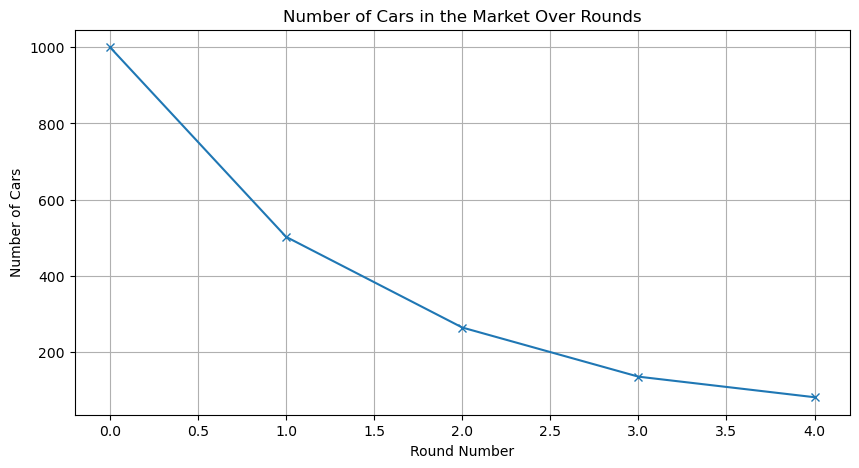

[1000, 502, 264, 135, 81]

In [20]:
def market_rounds(s=1000, rounds=5): # 1000 sellers and 5 rounds

    quality = np.random.randint(1, 101, size=s)  # Generating new car qualities
    market = pd.DataFrame(quality, columns=['Quality'])
    market['Price'] = market['Quality'] # I assume that each car's price is equal with its price
    market.sort_values(by='Quality', ascending=False, inplace=True) # I am sorting the dataframe and I am adding the condition true which shows us if the car is sold 
    history = []  # To be able to observe what happened on the market in each round
    for round_number in range(rounds): 
        history.append(len(market)) # Append the current number of cars in the market to the history list. This records the market size at the end of each round
        median_price = market['Price'].median()  # Assume a median price adjustment or buyer preference change
        market = market[market['Price'] <= median_price] # cars whose quality is higher than the price which the buyers are willing to pay drop out 
        if market.empty: #if no cars left on the market =>break loop
            print(f"Market cleared: no cars left after round {round_number}")
            break

    plt.figure(figsize=(10, 5)) #visualizing the rounds
    plt.plot(history, marker='x')
    plt.title('Number of Cars in the Market Over Rounds')
    plt.xlabel('Round Number')
    plt.ylabel('Number of Cars')
    plt.grid(True)
    plt.show()

    return history
market_rounds()

In each round, cars with a better quality to the asking price are withdrawn from the market by their sellers, which gradually reduces the number of cars available. This process leads to a progressive decrease in the overall quality of cars in the market. By the 4th round, only the cars with the lowest quality are likely to remain available for sale.

## Buyers
Let's pass to the buyers. They also derive utility from the car and from the other goods but their utility function is slighty different:

\begin{equation}
 U_B = Σ_{j=1}^{n} \frac{3}{2} X_j + M 
 \end{equation}

Buyers value cars 50% more than sellers and for this reason they want to acquire the car. Like sellers, buyers are trying to maximize utility. But think about a buyer who is considering buying a car of uncertain quality. In order to maximize his utility he has to think in expected utility terms. Suppose that the buyer wants to buy a car in this market. To do so he has to pay P euros thus he loses P units of utility but on the other hand he gains a car with ecpected value E[X|P] thus he gains 1.5*E[X|P]. Hence, he is going to buy if:
\begin{equation}
 \frac{3}{2} E[X_j]\geq P
 \end{equation}

We need to find 𝐸[𝑋|𝑃] to decide if buyers will buy with price P. The formula for expectation for a uniform distribution is simply the average of the endpoints so 

\begin{equation}
 𝐸[𝑋|𝑃]=\frac{1}{2} P
 \end{equation}. 

 We plug that into conditions for buying:

\begin{equation} 
\frac{3}{2}E[X|Ρ]>Ρ => \frac{3}{2}*\frac{1}{2} Ρ > Ρ => \frac{3}{4} > 1
 \end{equation} 

In other words, buyers recognize that only 'lemons' are available for purchase. Consequently, they choose not to buy any car, leading to the unraveling of the market. Therefore, due to information asymmetry, no Pareto optimal transactions occur, as no trades improve the well-being of both buyers and sellers without making the other worse off.

The code below simulates market dynamics over multiple rounds, tracking the number of cars and purchases. Buyers calculate utility based on car price and value, purchasing only if utility is positive. After several rounds, buyers recognize remaining cars as "lemons," halting transactions. Plots show market size and purchases across rounds.

More specifically the market_rounds function simulates a market, and buyers purchase cars if the utility exceeds zero. This utility calculation helps simulate buyer decision-making based on the perceived value of the cars.

Market dynamics are captured in two lists: history, which tracks the total number of cars available each round, and purchases, recording how many cars are actually bought. As the rounds progress, from the third round onward, buyers recognize all cars as lemons, leading to a cessation of purchases and an empty market. The simulation handles this by clearing the market if all cars are perceived as low quality.

The function plots the total cars available and the number bought each round, visually representing the market contraction and the impact of adverse selection. This plot helps illustrate how buyer perceptions and market conditions dynamically influence the viability of transactions in each round, effectively demonstrating a scenario of market failure due to adverse selection.

From round 4, buyers recognize all cars as lemons.
Market cleared: no cars left after round 4. No optimal transactions occur.


[1000, 503, 259, 136, 73]

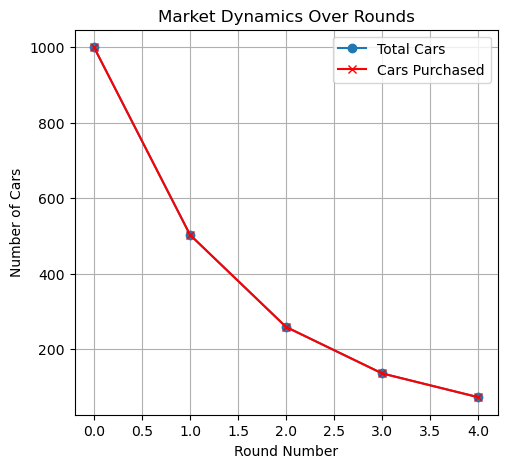

In [21]:

def market_rounds(s=1000, rounds=5, M=30):
      # Generating new car qualities as I did before
    market = pd.DataFrame(quality, columns=['Quality'])
    market['Price'] = market['Quality'] # I assume that each car's price is equal with its price
    market.sort_values(by='Quality', ascending=False, inplace=True) # I am sorting the dataframe and I am adding the condition true which shows us if the car is sold 
    history = []  # To be able to observe what happened on the market in each round
    market.sort_values(by='Quality', ascending=False, inplace=True)
    history = []  # To observe market size in each round
    purchases = []  # I am adding a list with which I will be able to track the number of purchases each round

    for round_number in range(rounds):
        history.append(len(market))
        market['Expected Utility'] = 1.5 * (0.5 * market['Price']) + M - market['Price'] # Calculate expected utility for buyers because based on this they make their decisions
        potential_purchases = market[market['Expected Utility'] > 0] # buyers buy only if their utility is higher than the price
        purchases.append(len(potential_purchases))

        if round_number >= 4: # After some point , let's say from the 3d round onward, buyers recognize they are buying lemons
            print(f"From round {round_number}, buyers recognize all cars as lemons.") # because they know that they buy lemons they stop buying
            market = market.iloc[0:0]  # empty the market to simulate no purchases
        else:
            median_price = market['Price'].median() # before 9th round they continue buying
            market = market[market['Price'] <= median_price]  # Remaining cars for next round

        if market.empty:
            print(f"Market cleared: no cars left after round {round_number}. No optimal transactions occur.")
            break

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history, marker='o', label='Total Cars')
    plt.plot(purchases, marker='x', label='Cars Purchased', color='red')
    plt.title('Market Dynamics Over Rounds')
    plt.xlabel('Round Number')
    plt.ylabel('Number of Cars')
    plt.legend()
    plt.grid(True)
    return history

market_rounds()




The chart shows market dynamics over several rounds, illustrating a rapid decrease in the total number of cars from 1000 to 72 by the third round, as buyers progressively identify more cars as lemons. This identification leads to fewer cars being purchased each round, indicating a market increasingly clearing itself of lower-quality cars. At the end the market unravels and no efficient transactions take place. 

The code below finds the equilibrium price that maximizes successful transactions in a market with buyers using a specific utility function. It calculates the number of successful transactions, where buyer utility (based on qualities, price, and a coefficient) exceeds zero. The minimize_scalar function optimizes the price within the range of 0 to 100, retrieving the equilibrium price and the maximum successful transactions.

So the code utilizes minimize_scalar from scipy.optimize to identify an optimal market price that maximizes successful transactions. It defines a utility function where the success of a transaction depends on the product quality and price. Qualities and prices are generated randomly for 1000 items, with qualities ranging from 0 to 100 and prices distributed uniformly up to $100.

A utility calculation, adjusted by a coefficient of 1.5, evaluates each transaction's success by comparing the derived utility to zero. The objective function returns the negative count of successful transactions, which minimize_scalar minimizes. By minimizing this negative value, the function effectively maximizes the number of successful transactions.

The optimization is bounded between 0 and 100 for the price. The results yield the equilibrium price where maximum transactions occur, indicating the most favorable market price under given conditions. This approach provides a practical demonstration of applying mathematical optimization to solve economic problems, particularly in determining effective pricing strategies in variable markets.

In [22]:

from scipy.optimize import minimize_scalar
def negative_total_transactions(price, qualities, coeff):
    expected_utilities = coeff * qualities - price
    successful_transactions = np.sum(expected_utilities >= 0)
    return -successful_transactions
np.random.seed(42)

qualities = np.random.randint(0, 101, size=1000) # Generate random qualities
prices = np.random.uniform(0, 100, size=1000) #Generate random prices
bounds = (0, 100)  # The price range
coeff = 1.5  # Example coefficient
result = minimize_scalar(negative_total_transactions, args=(qualities, coeff), bounds=bounds, method='bounded')
equilibrium_price = result.x
max_successful_transactions = -result.fun

print(f"Equilibrium price: {equilibrium_price:.2f}")
print(f"Maximum number of successful transactions: {int(max_successful_transactions)}")


Equilibrium price: 0.81
Maximum number of successful transactions: 984


The optimal price is 0.81, and the maximum successful transactions are 984. However, as previously mentioned, at this price, no reasonable seller with higher quality would choose to sell their car, leading to a market filled with 'lemons.' Consequently, no transactions would occur.

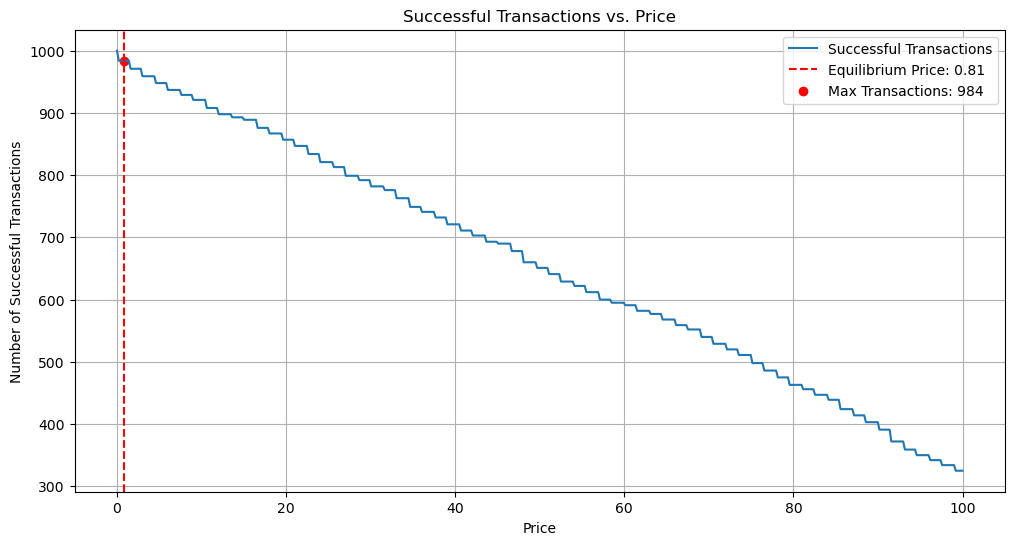

In [23]:
prices = np.linspace(0, 100, 500)  # Generate 500 evenly spaced prices between 0 and 100
successful_transactions = [-negative_total_transactions(price, qualities, coeff) for price in prices]
plt.figure(figsize=(12, 6))
plt.plot(prices, successful_transactions, label="Successful Transactions")
plt.axvline(x=equilibrium_price, color='red', linestyle='--', label=f"Equilibrium Price: {equilibrium_price:.2f}")
plt.scatter(equilibrium_price, max_successful_transactions, color='red', label=f"Max Transactions: {int(max_successful_transactions)}")
plt.title('Successful Transactions vs. Price')
plt.xlabel('Price')
plt.ylabel('Number of Successful Transactions')
plt.legend()
plt.grid(True)
plt.show()


This diagram shows the relationship between price (x-axis) and the number of successful transactions (y-axis). The blue line represents the decreasing number of successful transactions as price increases. The red dashed line marks the equilibrium price of 0.81, where transactions are maximized, achieving 984 successful transactions, shown by the red dot. At low prices, nearly all buyers participate, but as prices rise, fewer buyers meet the utility threshold, reducing successful transactions. However, with these low prices the sellers drop out because as I metioned above their good quality cars cost more than 0.81 and as a result no seller in right mind will sell in such a low price. 

But, what happens if we modify the utility function of the buyer? Will we observe the same results?

In the following code, I am going to simulate transactions for different utility functions. More specifically, I will change the coefficient from 1.5 to 1.2 and 1.8.

Again I use the minimize_scalar function from the scipy.optimize library to determine the equilibrium price that maximizes successful market transactions under varying conditions. It operates by defining a utility function, which determines the success of transactions based on the relationship between product quality, price, and a coefficient multiplier. The utility function returns the negative count of successful transactions, aiming to maximize these by finding the optimal price through minimization.

The script begins by setting a seed for reproducibility, ensuring consistent results across runs. It then generates 1000 random product qualities. A list of different coefficients is tested to observe how varying levels of price sensitivity affect the optimal pricing strategy. For each coefficient, the script runs an optimization within defined bounds (0 to $100) to find the price that maximizes the number of successful transactions.

The results of each optimization are stored in a DataFrame, providing a clear and structured visualization of how the equilibrium price and the maximum number of successful transactions vary with different coefficients. This methodical approach demonstrates a practical application of optimization techniques in economic modeling, particularly in analyzing and determining effective pricing strategies based on market dynamics.

In [24]:
def negative_total_transactions(price, qualities, coeff):
    """Calculate the negative of successful transactions to be minimized."""
    expected_utilities = coeff * qualities - price
    successful_transactions = np.sum(expected_utilities >= 0)
    return -successful_transactions
np.random.seed(42)
qualities = np.random.randint(0, 101, size=1000)
bounds = (0, 100)
coefficients = [ 1.1,1.2, 1.4,1.5, 1.8,2]
results = []
for coeff in coefficients:
    result = minimize_scalar(negative_total_transactions, args=(qualities, coeff), bounds=bounds, method='bounded')
    equilibrium_price = result.x
    max_successful_transactions = -result.fun

    # Append results to the list
    results.append({
        'Coefficient': coeff,
        'Equilibrium Price': equilibrium_price,
        'Max Successful Transactions': int(max_successful_transactions)
    })
results_df = pd.DataFrame(results)
print(results_df)


   Coefficient  Equilibrium Price  Max Successful Transactions
0          1.1           1.315568                          971
1          1.2           1.315568                          971
2          1.4           0.813068                          984
3          1.5           0.813068                          984
4          1.8           2.128630                          971
5          2.0           2.128630                          971


As is easily understood, the problem of asymmetric information will have the same effects regardless of the value of the coefficient in the buyers' utility function. Different coefficients result in different optimal prices and varying numbers of successful transactions, but in the end, the market unravels.

# AI: a possible solution to information assymetry 

Let's create a scenario where technology helps buyers to make a more informed decision. For example they can take pictures of the cars before they buy them and an Artificial Intelligence program is able to evaluate the car's quality. I am going to examine a case when the AI program is 80% accurate.  

So due to the AI the workers have a new expected utility function. 

\begin{equation} 
 U_B = \sum_{j=1}^{n} \left(0.8 \times \frac{3}{2} X_j + 0.2 \times \frac{3}{2} E[X_j|P] \right) + M
\end{equation} 

Xj is the AI-assessed quality of car j, accurate 80% of the times. 

E[Xj|P] is the expected quality of car j based on price, used when the AI's assessment is incorrect (20% of the time).

The buyers want to maximize their new utility. 

The code below eith the simulate_market function simulates the market over five rounds, assessing how AI accuracy in predicting car quality affects buyer behavior and market prices. Each round generates a random set of car qualities which are directly used as initial asking prices. A DataFrame is then constructed to manage these values alongside AI-assessed qualities, which match the true quality if the AI's prediction is accurate (80% chance) or are randomly reassigned if not.

The function calculates the expected quality either directly from the AI or based on a price adjustment using a normal distribution to add variability. Buyers’ willingness to pay is set at 1.5 times this expected quality. For each price from 0 to 100, the function counts how many buyers are willing to pay at least that price, considering a price as a potential equilibrium if it's acceptable to at least half the buyers.

The list of potential equilibrium prices for each round is averaged to determine the equilibrium price for that round, which is stored and later plotted against the round number to visualize how equilibrium prices evolve through the simulation. This model helps explore the dynamics of price setting in response to changing quality assessments in a market influenced by AI.
 

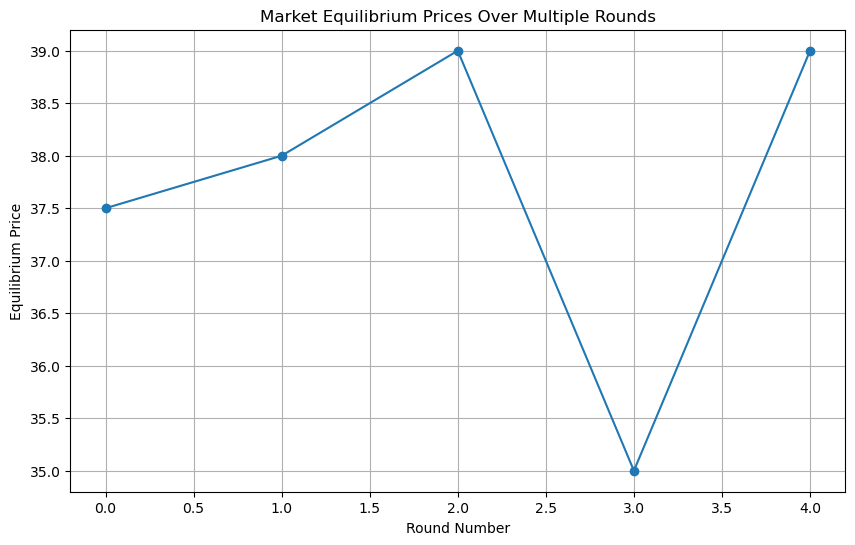

In [25]:
def simulate_market(s=1000, ai_accuracy=0.8, rounds=5):
    equilibrium_prices = []  # List to store the equilibrium prices for each simulation roun
    
    for _ in range(rounds):  # run the market for 10 rounds
        qualities = np.random.randint(0, 101, size=s) # Generate random qualities for cars between 0 and 100
        prices = qualities # Set initial asking prices equal to the quality of each car
        
        market = pd.DataFrame({'True Quality': qualities, 'Initial Price': prices}) # Create a DataFrame to hold car data
        
        market['AI Quality'] = np.where(np.random.rand(s) < ai_accuracy, market['True Quality'], np.random.randint(0, 101, size=s))  # AI assesses the quality of each car: if it guesses right (based on ai_accuracy), use the true quality
        
        price_based_quality = (market['Initial Price'] + np.random.normal(0, 10, size=s)).clip(0, 100) # expected quality based on price when AI is incorrect
        market['Expected Quality'] = np.where(market['AI Quality'] == market['True Quality'], market['AI Quality'], price_based_quality) # the expected quality for each car. 
    # If the AI quality matches the true quality, then the AI's assessment is used directly if not then the other priced is used

        market['Willingness to Pay'] = 1.5 * market['Expected Quality'] # buyers' willingness to pay, which is 1.5 times the expected quality
        
        temp_equilibrium_prices = []  # List to store potential equilibrium prices for this round
        # Check how many buyers are willing to pay at least each price from 0 to 100
        for price in range(0, 101):
            buyers = market[market['Willingness to Pay'] >= price] #For each price, we check how many buyers have a willingness to pay that is at least as much as the current price.
# If  half or more of the buyers are willing to pay that price or more, the price is considered a potential equilibrium price and is added to the equilibrium_prices list.
           
            if len(buyers) >= len(market) / 2:
                temp_equilibrium_prices.append(price)
        

        if temp_equilibrium_prices: # we check if there are any prices in equilibrium list and if there are then we take the mean
            equilibrium_price = np.mean(temp_equilibrium_prices)
            equilibrium_prices.append(equilibrium_price)
        else:
            equilibrium_prices.append(None)
    
  
    return equilibrium_prices  

equilibrium_prices = simulate_market()
plt.figure(figsize=(10, 6))
plt.plot(equilibrium_prices, marker='o', linestyle='-')  # Plot the equilibrium prices over the rounds
plt.title('Market Equilibrium Prices Over Multiple Rounds')
plt.xlabel('Round Number')
plt.ylabel('Equilibrium Price')
plt.grid(True)
plt.show()


Immediately after introducing AI, the equilibrium price increased. These prices allow some mid-quality cars to remain in the market, preventing it from unraveling. As a result, the market now consists of both lemons and mid-quality cars. Buyers seeking mid-quality cars can now purchase them, thanks to the improved market dynamics enabled by AI.

## Minimize the number of unsuccesful transactions

Now, let's the optimal solution which maximizes the succesful transactions.  A transaction is considered successful if the buyer's expected utility exceeds zero. 

In this code, I simulate a market where AI technology, with 80% accuracy, helps buyers assess car quality. Buyers make purchasing decisions based on their expected utility, calculated as a function of AI-assessed car quality and price, adjusted by a utility coefficient (set to 1.5 here). Using randomized initial prices, I optimize the prices to maximize the number of successful transactions (where buyers' utility is positive).

After optimization, I calculate the AI-assessed qualities and expected utilities to classify cars as "sold" or "unsold" based on whether their utility is above zero. This setup demonstrates how AI impacts market dynamics and transaction outcomes.

More specifically the provided script uses the minimize function from scipy.optimize to optimize car prices in a market simulation where AI technology assesses car qualities. The objective is to maximize the number of successful transactions, defined as those where the buyer's utility, calculated as the product of a utility coefficient and AI-assessed quality minus the price, is non-negative.

The code initializes with random car qualities and prices for 1000 cars. AI accuracy is set at 80%, implying that the AI correctly predicts the car's quality 80% of the time; otherwise, it assigns a random quality. A utility coefficient of 1.5 is used to calculate expected utilities.

Optimization is performed using the L-BFGS-B method, appropriate for bound-constrained problems, to find prices that maximize successful transactions. This method takes the initial random prices as starting points and iteratively adjusts them within defined bounds (0 to 100).

After optimization, the script calculates and prints the optimized prices for the first ten cars and the total number of successful transactions. Additionally, it re-evaluates which cars are considered sold under the new pricing, providing a clear understanding of the optimization's impact on market dynamics. This simulation highlights how AI-assisted pricing strategies can effectively enhance market outcomes.

In [26]:
from scipy.optimize import minimize, Bounds
def negative_transactions_with_ai(prices, qualities, ai_accuracy, coeff):
    # Simulate AI-assessed qualities with variability based on AI accuracy
    AI_qualities = np.where(np.random.rand(len(qualities)) < ai_accuracy, 
                            qualities,  # AI is correct
                            np.random.randint(0, 101, size=len(qualities)))  # AI is incorrect
    expected_utilities = coeff * AI_qualities - prices
    successful_transactions = np.sum(expected_utilities >= 0)
    return -successful_transactions  # Minimize the negative for maximization

np.random.seed(42)
qualities = np.random.randint(0, 101, size=1000)  # Random car qualities
price_bounds = Bounds(0, 100)  # Price range is bounded between 0 and 100
ai_accuracy = 0.8  # AI accuracy
coeff = 1.5  # Buyer utility coefficient
initial_prices = np.random.uniform(0, 100, size=1000)

result = minimize(
    negative_transactions_with_ai,
    x0=initial_prices,  # Randomized initial prices
    args=(qualities, ai_accuracy, coeff),
    method='L-BFGS-B',
    bounds=price_bounds
)
optimal_prices = result.x
max_successful_transactions = -result.fun

print(f"Optimal prices with AI (first 10): {optimal_prices[:10]}")
print(f"Maximum successful transactions with AI: {int(max_successful_transactions)}")
AI_qualities = np.where(np.random.rand(len(qualities)) < ai_accuracy, 
                        qualities, 
                        np.random.randint(0, 101, size=len(qualities)))
expected_utilities = coeff * AI_qualities - optimal_prices
sold = expected_utilities >= 0  # Boolean array for sold cars



Optimal prices with AI (first 10): [32.20791656 21.1448007  32.74973522 11.97621318 89.05272807 59.35924536
 67.91023191 78.91712386 49.84421989  8.69202881]
Maximum successful transactions with AI: 675


In this scenario, the market does not unravel because buyers can assess the cars' quality to some extent, thanks to AI assistance. As a result, sellers can differentiate prices and sell higher-quality cars at higher prices, maintaining market activity.

In the code below, I will generate plots to demonstrate this relationship visually.

The firts one is a scatter plot which visualizes the relationship between car quality, optimized prices, and sale status. Sold cars, marked as blue circles, represent cars with a positive utility for buyers at their optimized prices. Unsold cars, shown as orange crosses, indicate cars with negative utility, making buyers unwilling to purchase them. The x-axis represents car quality, while the y-axis displays optimized prices. Transparency highlights overlapping points, and a grid improves readability. The plot demonstrates how car quality and optimized pricing determine market transactions.

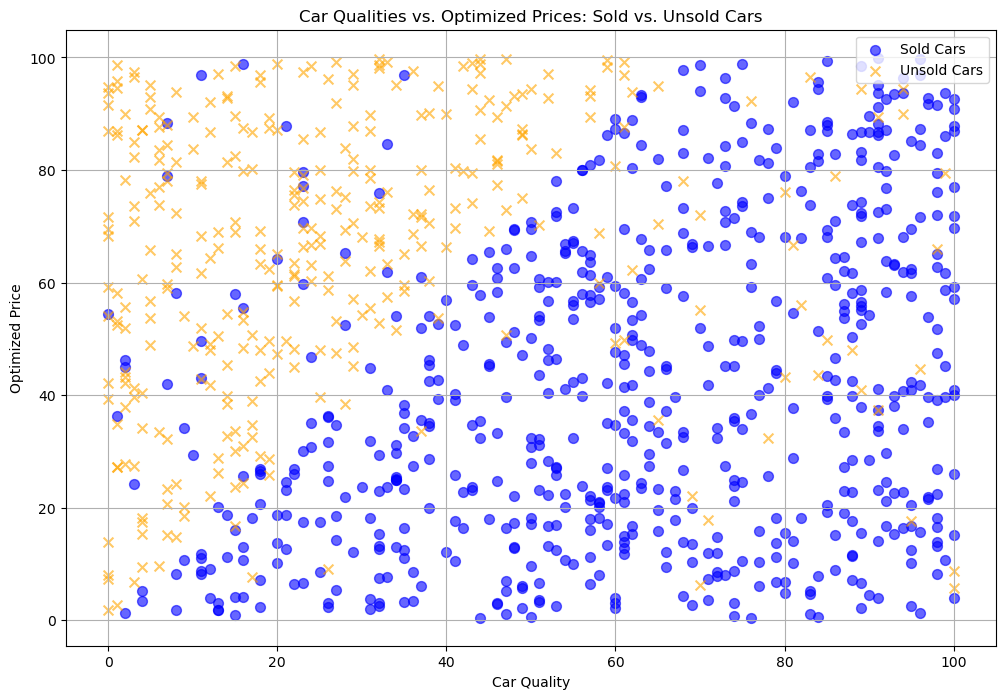

In [27]:
# I Create a scatter plot for sold and unsold cars
plt.figure(figsize=(12, 8))
plt.scatter(
    qualities[sold], optimal_prices[sold],
    color='blue', alpha=0.6, label='Sold Cars', marker='o', s=50
)
plt.scatter(
    qualities[~sold], optimal_prices[~sold],
    color='orange', alpha=0.6, label='Unsold Cars', marker='x', s=50
)

plt.title('Car Qualities vs. Optimized Prices: Sold vs. Unsold Cars')
plt.xlabel('Car Quality')
plt.ylabel('Optimized Price')
plt.legend()
plt.grid(True)
plt.show()


This scatter plot displays the relationship between car qualities (x-axis) and their optimized prices (y-axis). Blue circles represent sold cars, where buyer utility is positive, while orange crosses represent unsold cars, where utility is negative. Higher-quality cars tend to be sold more often, especially when prices align with buyers’ expectations. The distribution highlights the market dynamics influenced by optimized pricing.

The next scatter plot compares buyer utilities to optimized prices, highlighting how utility influences car sales. Each point represents a car, with its quality (x-axis) and optimized price (y-axis). The color scale (from a colormap) reflects buyer utility levels, where higher utilities appear in warmer colors (red) and lower utilities in cooler colors (blue). Sold cars, identified as having positive utility, are marked with black-edged circles to distinguish them. The plot visually demonstrates the relationship between car quality, price, and buyer utility.

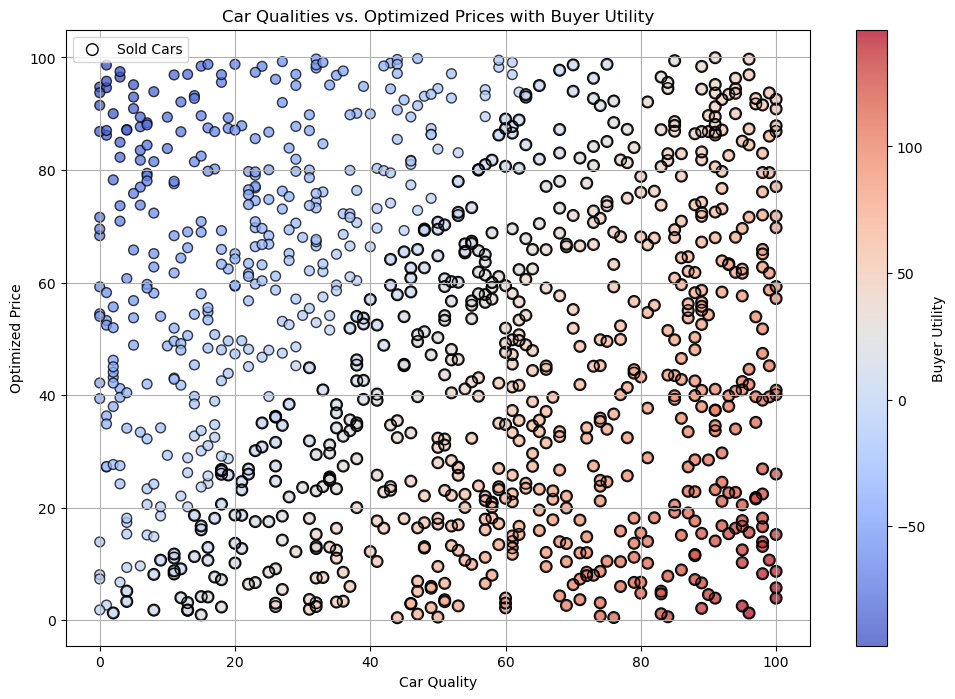

In [28]:
expected_utilities = 1.5 * qualities - optimal_prices
sold = expected_utilities >= 0  # Boolean array for sold cars
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    qualities, optimal_prices, 
    c=expected_utilities, cmap='coolwarm', alpha=0.75, edgecolor='k', s=50
)
plt.colorbar(scatter, label='Buyer Utility')

plt.scatter(
    qualities[sold], optimal_prices[sold], # I highlight sold cars in a different marker
    edgecolor='black', facecolor='none', marker='o', s=70, label='Sold Cars'
)

plt.title('Car Qualities vs. Optimized Prices with Buyer Utility')
plt.xlabel('Car Quality')
plt.ylabel('Optimized Price')
plt.legend()
plt.grid(True)
plt.show()


This diagram illustrates the relationship between car qualities (on the x-axis) and optimized prices (on the y-axis) in a market influenced by AI technology. Each point represents a car, with its color indicating buyer utility. Red shades represent positive utility (sold cars), while blue shades indicate negative utility (unsold cars). Sold cars are marked with black outlines. Generally, higher-quality cars sell at higher prices, while overpriced or low-quality cars remain unsold due to insufficient utility. The AI’s 80% accuracy introduces variation in utility, influencing transaction outcomes.

#### Different Coefficients
Below I am going to do exactly the same as before (minimize the number of unsuccesful transactions) but now I am going to change the utility coefficient.

In [29]:
def negative_transactions_with_ai(prices, qualities, ai_accuracy, coeff):
    AI_qualities = np.where(np.random.rand(len(qualities)) < ai_accuracy, 
                            qualities,  # AI is correct
                            np.random.randint(0, 101, size=len(qualities)))  # AI is incorrect
    expected_utilities = coeff * AI_qualities - prices
    successful_transactions = np.sum(expected_utilities >= 0)
    return -successful_transactions  # Minimize the negative for maximization
np.random.seed(42)
qualities = np.random.randint(0, 101, size=1000)  # Car qualities
price_bounds = Bounds(0, 100)  # Prices are bounded between 0 and 100
ai_accuracy = 0.8  # AI accuracy 
coefficients = [ 1.1,1.2, 1.4,1.5, 1.8,2]  # Coefficients to test
results = []
for coeff in coefficients:
    initial_prices = np.random.uniform(0, 100, size=1000)  # Random initial prices
    result = minimize(  # Optimize prices for each coefficient
        negative_transactions_with_ai, 
        x0=initial_prices,  # Initial guess for prices
        args=(qualities, ai_accuracy, coeff), 
        method='L-BFGS-B', 
        # Using the L-BFGS-B optimization method:
        # L-BFGS-B is a memory-efficient optimization algorithm suitable for large-scale problems and it approximates the Hessian matrix (second derivatives) for smooth functions.
        # The B in L-BFGS-B allows box constraints ( bounds on prices between 0 and 100).
        bounds=price_bounds
    )
    
    optimal_prices = result.x # I extract the results
    max_successful_transactions = -result.fun
    
    results.append({ # I store results in the list
        'Coefficient': coeff,
        'Max Successful Transactions': int(max_successful_transactions),
        'Average Optimal Price': np.mean(optimal_prices)
    })

results_df = pd.DataFrame(results) # I convert results to a DataFrame
print(results_df)


   Coefficient  Max Successful Transactions  Average Optimal Price
0          1.1                          566              49.976506
1          1.2                          598              49.428181
2          1.4                          633              50.824162
3          1.5                          676              47.682019
4          1.8                          703              50.675449
5          2.0                          727              50.691321


The results show how changes in the coefficient, which reflects how much buyers value cars, affect the market. As the coefficient increases, more transactions happen, rising from 566 at 1.1 to 727 at 2.0. This means buyers are more likely to buy cars when they value them more. The average optimal price varies slightly, starting lower at lower coefficients (1.1–1.2) and stabilizing around 50.68 for higher coefficients (1.8–2.0). This suggests that as buyers value cars more, they are willing to pay higher prices, leading to more successful sales and a healthier market.



I generate a scatter plot to visualize the relationship between maximum successful transactions and average optimal prices, with each point colored to represent different utility coefficients. This visualization is derived from a DataFrame containing results from an optimization analysis that assessed the impact of varying utility coefficients on market outcomes. The scatter plot is created using plt.scatter(), where the x-axis represents maximum successful transactions, the y-axis shows average optimal prices, and the color of each point indicates the coefficient value used, making it clear how changes in buyer sensitivity affect market dynamics. A colorbar is added to aid in interpreting the coefficients corresponding to each color, effectively mapping the color gradient to the coefficient values. The plot is enhanced with a title, axis labels, and a grid, improving readability and providing a comprehensive overview of how different coefficients influence the number of transactions and pricing strategies in a simulated market setting. This visual tool allows for an immediate grasp of the complex interplay between price optimization and consumer behavior as modeled in the optimization process.

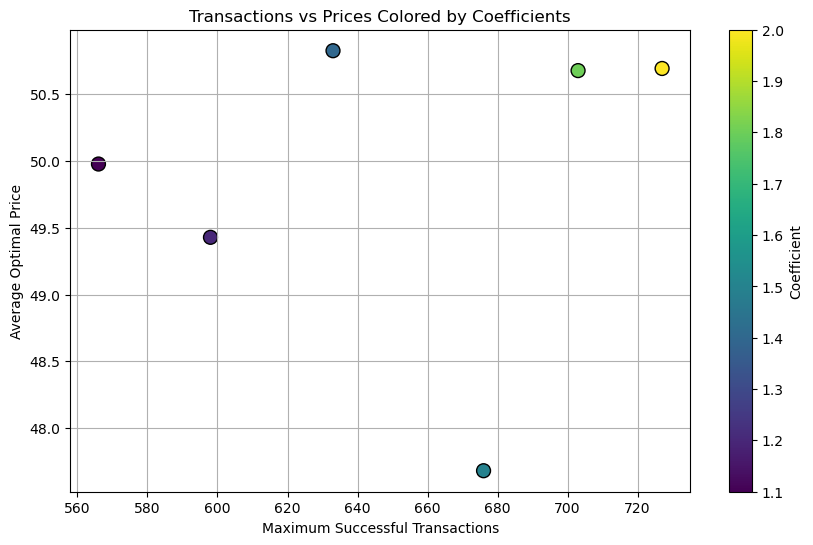

In [30]:
coefficients = results_df['Coefficient']
transactions = results_df['Max Successful Transactions']
avg_prices = results_df['Average Optimal Price']

plt.figure(figsize=(10, 6))
sc = plt.scatter(transactions, avg_prices, c=coefficients, cmap='viridis', edgecolor='k', s=100)
cbar = plt.colorbar(sc)
cbar.set_label('Coefficient')
plt.title('Transactions vs Prices Colored by Coefficients')
plt.xlabel('Maximum Successful Transactions')
plt.ylabel('Average Optimal Price')
plt.grid(True)
plt.show()

This diagram demonstrates the relationship between the number of maximum successful transactions (on the x-axis) and the average optimal price (on the y-axis) for various coefficients of buyer utility. Each point represents a scenario with a specific coefficient, with its color indicating the coefficient value. Higher coefficients lead to more successful transactions, but the corresponding average optimal price varies slightly, reflecting the influence of buyer utility preferences on market equilibrium.

It is quite intresting that the coefficient of 1.5 has a lower average price. Probably this happens because it represents a balance between buyer valuation and market dynamics. At this level, buyers value cars moderately (neither too low nor too high), leading to optimized prices that maximize transactions by encouraging both buyers and sellers to engage. This moderate valuation results in a slightly lower average price compared to higher coefficients like 1.8 or 2.0, where buyers value cars more highly and are willing to pay higher prices. Also it results in a slightly lower average price compared to lower coefficients such as 1.1 or 1.4 because it achieves a better balance between buyer valuation and market efficiency. Lower coefficients mean buyers value cars less, leading to higher prices for successful transactions since fewer cars meet the buyers' lower utility thresholds

### 100 times stimulation 

Below I run our scenario (80% AI assistant)for 100 times to explore the impact of uncertainty.After running 100 simulations, the script calculates the maximum number of successful transactions, the average optimal price, and the standard deviation of prices for each scenario. These results are stored in a pandas DataFrame, and descriptive statistics are computed to summarize the outcomes. This process demonstrates how AI-assisted pricing can improve market efficiency under uncertainty. I did not do it for more than 100 times because after my computer had a problem to run the code.








In [31]:
# Parameters
np.random.seed(42)
simulations = 100  # Number of draws
ai_accuracy = 0.8  # AI accuracy
coeff = 1.5  # Buyer utility coefficient
price_bounds = Bounds(0, 100)  # Price bounds
results = []

for i in range(simulations):
    qualities = np.random.randint(0, 101, size=1000)
    initial_prices = np.random.uniform(0, 100, size=1000)
    result = minimize(
        negative_transactions_with_ai,
        x0=initial_prices,
        args=(qualities, ai_accuracy, coeff),
        method='L-BFGS-B',
        bounds=price_bounds
    )
    
    optimal_prices = result.x
    max_successful_transactions = -result.fun  # Successful transactions
    results.append({ #I store the results
        "Max Successful Transactions": max_successful_transactions,
        "Average Optimal Price": np.mean(optimal_prices),
        "Std Optimal Price": np.std(optimal_prices)
    })
results_df = pd.DataFrame(results)
print(results_df.describe())


       Max Successful Transactions  Average Optimal Price  Std Optimal Price
count                   100.000000             100.000000         100.000000
mean                    664.240000              50.060143          28.892561
std                      15.805714               0.897117           0.373366
min                     617.000000              47.451641          27.902204
25%                     655.000000              49.585261          28.629921
50%                     666.000000              49.964922          28.871264
75%                     675.000000              50.720674          29.105704
max                     703.000000              51.932995          29.757846


Here we see that indeed AI can be a sufficient answer in the assymetric information problem. Across 100 different markets, AI successfully improved the number of successful transactions. The median number of transactions reached 666, with a minimum of 617 and maximum 703. These results indicate that technology can be an efficient tool for enhancing overall market welfare by facilitating market participation and reducing inefficiencies caused by information asymmetry.

### Discussion and Conclusion

Overal I highlight the destructive impact of asymmetric information on market and how the introduction of AI technology mitigates these issues, leading to a more stable and efficient market.

#### The Problem of Asymmetric Information
In markets with asymmetric information, buyers cannot differentiate between high-quality cars (peaches) and low-quality cars (lemons). This results in a significant problem: buyers lower their willingness to pay, assuming the average quality is low. Consequently, sellers of high- and mid-quality cars leave the market, as they cannot sell their cars at prices that reflect their value. This phenomenon, known as **adverse selection**, creates a market filled with lemons. In this scenario, utility is not maximized, and the market unravels.

#### Introduction of AI Technology
To address the issue of asymmetric information, I introduced AI technology with 80% accuracy. This AI system assists buyers to estimate the quality of cars with greater reliability, bridging the information gap between buyers and sellers. The results show that introducing AI immediately raises the equilibrium price, allowing mid-quality cars to remain in the market. This contrasts sharply with the initial scenario, where only lemons dominated the market. By providing buyers with better information, AI boosts their knowledge in purchasing higher-quality cars, stabilizing the market.

#### Optimizing Market Outcomes
I also showed how AI impacts the number of successful transactions. A successful transaction is defined as one where the buyer’s utility is positive or neutral—meaning the buyer values the car as much as or more than the price paid. The results indicate that the number of successful transactions depends on the **utility coefficient**, which reflects how much buyers value cars. As the coefficient increases, buyers’ willingness to pay rises, resulting in more successful transactions.

#### Role of AI in Market Stability
AI plays a critical role in reducing the adverse effects of asymmetric information. In the initial model, there is a threshold price: if prices drop too low, sellers of good-quality cars exit the market. With AI, this threshold disappears. The key here is that sellers are able to **differentiate** their prices based on car quality, and buyers are willing to pay higher prices for better-quality cars. This prevents the market from unraveling and ensures that both mid- and high-quality cars remain available.

#### Key Insights
The findings demonstrate that AI creates a more efficient market where both buyers and sellers benefit. By improving buyers’ ability to assess car quality, AI increases the equilibrium price, stabilizes the market, and facilitates more transactions. Importantly, AI enables fair pricing for higher-quality cars, allowing sellers to stay in the market while buyers derive greater utility from their purchases. Notably, in 100 different markets, the results consistently demonstrated these positive outcomes, reinforcing the effectiveness of AI in addressing asymmetric information.

#### Conclusion
In summary, I illustrated the detrimental effects of asymmetric information on markets and highlights the transformative potential of AI in addressing these issues. By reducing information asymmetry, AI ensures a more balanced and functional market. The technology not only prevents market failure but also maximizes utility and transaction efficiency, demonstrating the significant benefits of leveraging AI in markets facing information challenges.